In [33]:
import torch 
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import datasets

In [34]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples= n_pts, random_state = 123, centers = centers, cluster_std= 0.4)
x_data = torch.tensor(X)
y_data = torch.tensor(y)

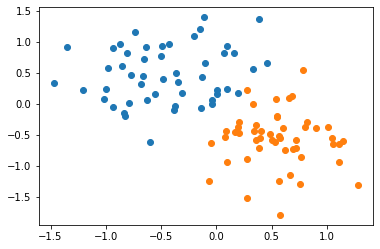

In [35]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
scatter_plot()

In [36]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    def predict(self, x):
        pred = self.forward(x)
        if pred > 0.5:
            return 1
        else:
            return 0

In [37]:
torch.manual_seed(2)
model = Model(2,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [38]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
b1 = b.view(1)
print(w1.item(), w2.item())
print(b1.item())
def get_params():
    return (w1.item(), w2.item(), b1.item())

0.1622033268213272 -0.1682732254266739
0.1939089596271515


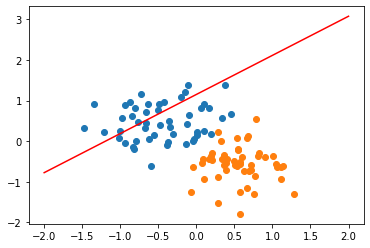

In [39]:
def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2, 2])
    x2 = (w1 * x1 + b1)/(-w2)
    plt.plot(x1, x2, 'r')
    scatter_plot()
    plt.show()
plot_fit('Initial Model')    


In [40]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [41]:
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model.forward(x_data.float())
    
    # we add the unsqueeze to change the shape of target to [100,1] from [100]
    loss = criterion(y_pred.float(), y_data.unsqueeze(1).float())

    if i %100 == 0:
        print('Epoch: ', i, ', Loss: ', loss.item())
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:  0 , Loss:  0.6185115575790405
Epoch:  100 , Loss:  0.5289827585220337
Epoch:  200 , Loss:  0.46342259645462036
Epoch:  300 , Loss:  0.41410142183303833
Epoch:  400 , Loss:  0.3759410083293915
Epoch:  500 , Loss:  0.34564027190208435
Epoch:  600 , Loss:  0.321025013923645
Epoch:  700 , Loss:  0.300630658864975
Epoch:  800 , Loss:  0.2834455966949463
Epoch:  900 , Loss:  0.26875314116477966


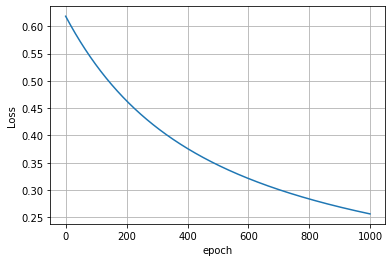

In [42]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

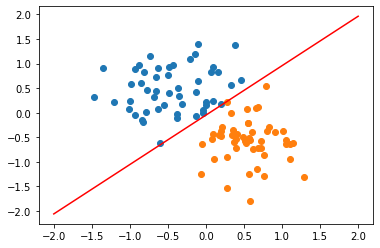

In [43]:
plot_fit("Trained Model")

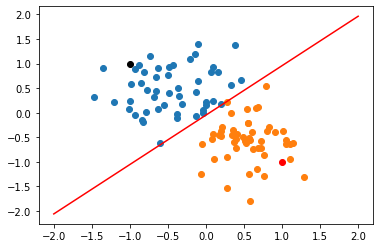

Red point positive probability: 0.9424158334732056
Black point positive probability: 0.05055497586727142
Red point belongs to class: 1
Black point belongs to class: 0


In [50]:
# doing some manual predictions 
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
plot_fit('Trained Model')
print('Red point positive probability: {}'.format(model.forward(point1).item()))
print('Black point positive probability: {}'.format(model.forward(point2).item()))
print('Red point belongs to class: {}'.format(model.predict(point1)))
print('Black point belongs to class: {}'.format(model.predict(point2)))